# Analyze Ball on Incline data
Use this notebook to quickly test whether your ball on incline data makes sense!

In [1]:
# Imports
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats
from scipy import special
from scipy.special import erfc                         # Error function, to get integral of Gaussian
from scipy.signal import find_peaks
import random as r

## Reading the data

The function "read_csv(filename)" takes in a filename and returns numpy arrays with time and voltage.

In [2]:
def read_csv(filename):
    """Read CSV from Waveforms"""
    dat = np.genfromtxt(filename, delimiter=',', skip_header=14, names=True)
    #print(dat)
    time = dat['Time_s']
    voltage = dat['Channel_1_V']
    return time, voltage

def find_midpoints(time, voltage, show_plot=True):
    """Find timing of ball crossings"""

#Filtering data points without detection
    voltage_peaks = np.zeros(len(voltage))
    time_peaks =  np.zeros(len(voltage))
    index = np.zeros(len(voltage))

    for i in range(len(voltage)):

        if voltage[i] > np.max(voltage)-1:
            voltage_peaks[i] = voltage[i]
            time_peaks[i] = time[i]
            index[i] = i


    #Finding the voltage peaks

    peaks = np.zeros(5)
    peak_index = np.zeros(5)
    t_pass = np.zeros(5)

    i = 0
    count = 0
    peaknumber = 0

    while i < len(voltage)-1:
        
        if voltage_peaks[i] != 0:

            if voltage_peaks[i] != 0 and voltage_peaks[i+1] == 0:
                peaks[peaknumber] = np.max(voltage_peaks[count:i])
                
                count = i

                t_pass[peaknumber] = time[count]
                peak_index[peaknumber] = count

                peaknumber += 1
        i += 1   
            
    t_pass_sigma = np.zeros(5)
    
    return t_pass, t_pass_sigma

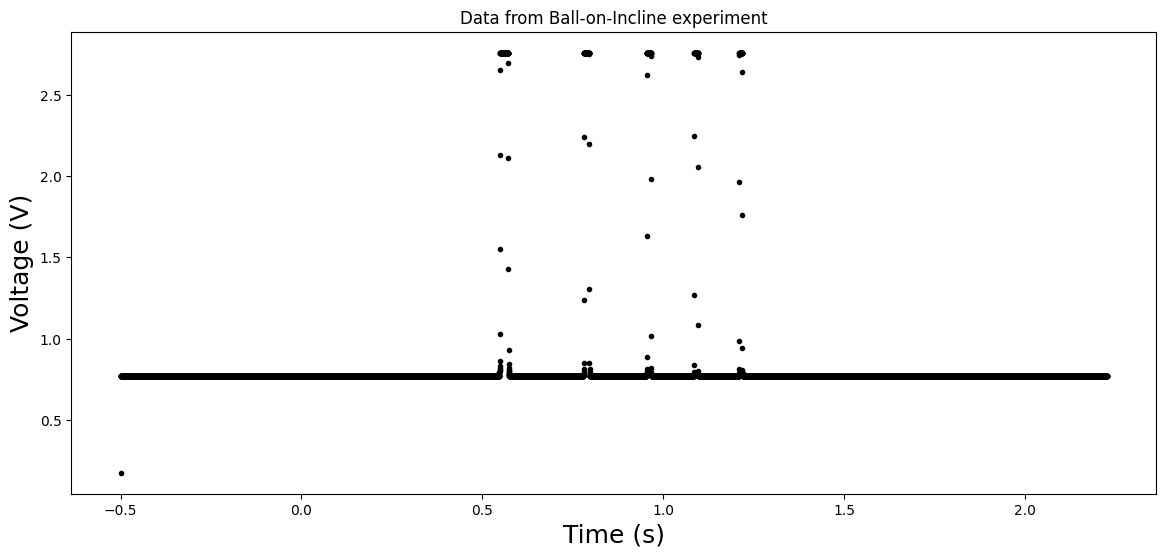

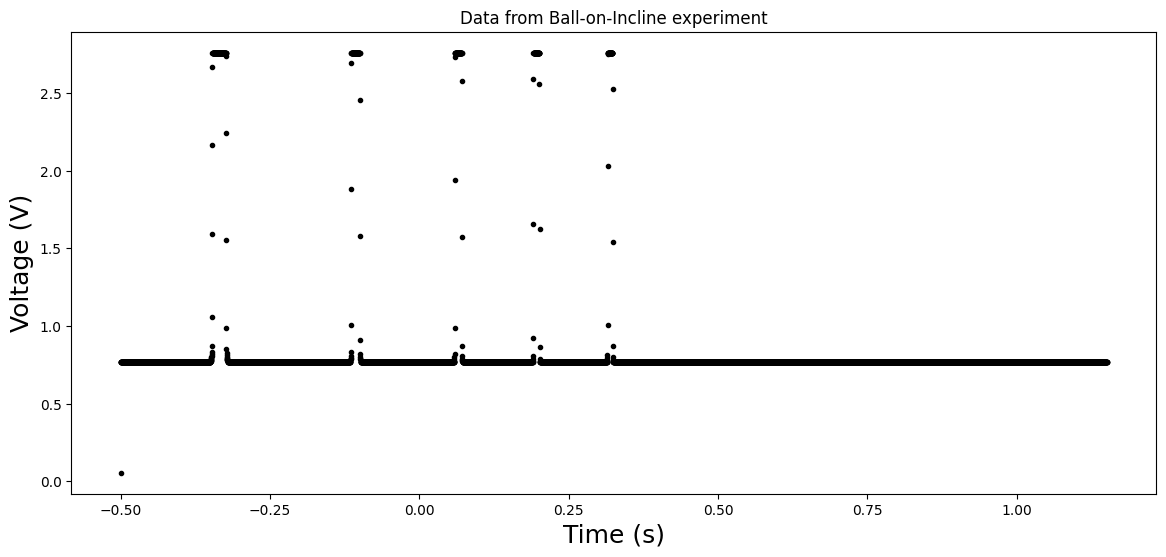

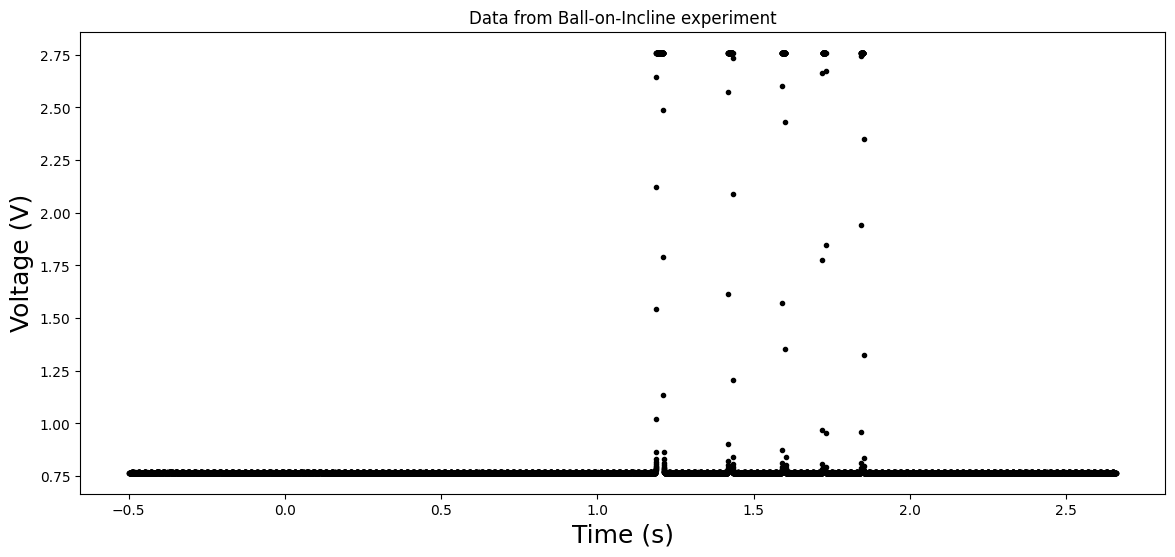

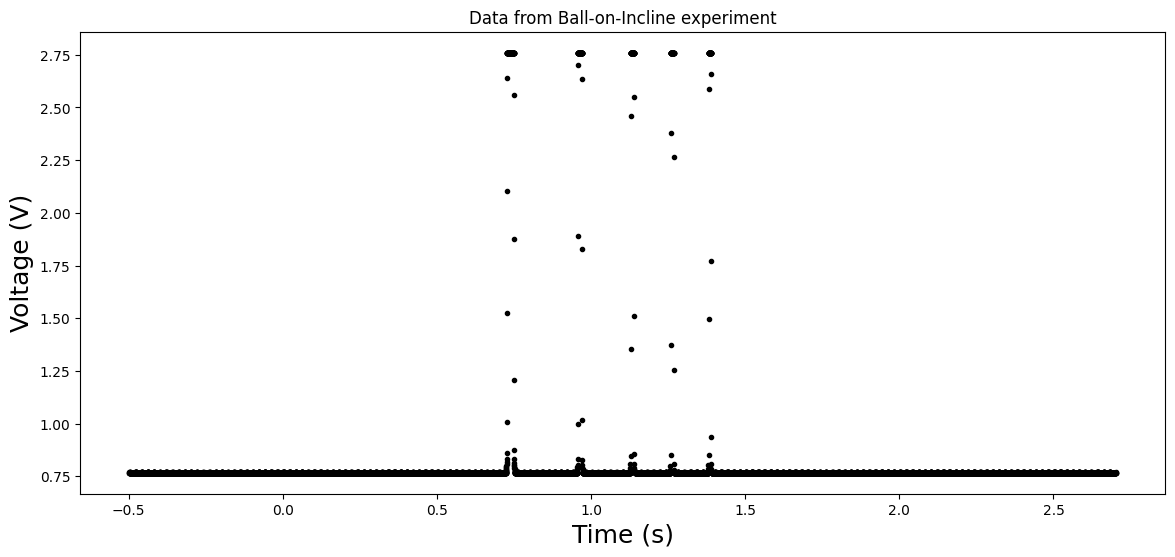

In [3]:
# Read the data and plot it (possibly with passing times in):
filenames = ['rev_fald.csv','rev_fald2.csv','Test_Fald.csv','Test_Fald2.csv']
#filename = 'Test_Fald2.csv'
for filename in filenames:
    time, voltage = read_csv(filename)
    timepass, timepass_sig = find_midpoints(time, voltage)

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(time, voltage, 'k.', label='Measurements')
    ax.set_title("Data from Ball-on-Incline experiment")
    ax.set_xlabel("Time (s)", fontsize=18)
    ax.set_ylabel("Voltage (V)", fontsize=18)
    t_detections = find_midpoints(time, voltage, show_plot=True)[0]
    plt.show()

In [10]:

Gate_diff_K = 0.01*np.array([20.75,37.95,55.1,71.5,89.45]) #cm
Gate_diff_T = 0.01*np.array([20.75, 37.35, 55.05, 71.50,89.45])
Gate_diff_M = 0.01*np.array([20.75, 37.40, 55.05, 71.50, 89.45])
Gate_diff_err = 0.05
Gate_mean = []

for x,y,z in zip(Gate_diff_K,Gate_diff_M,Gate_diff_T):
    Gate_mean.append(np.mean([x,y,z]))

print(Gate_mean)
D_rail = [5.9,5.4,6] #mm, K, T, M
D_rail_mean = 0.001*np.mean(D_rail) #m
D_railerr = 0.001*0.1 #m
D_ball = 0.001*14.9 #m
def quad(x,a,b,c):
    return 1/2*a*x**2 + b*x +c


[0.20750000000000002, 0.37566666666666665, 0.5506666666666667, 0.715, 0.8945000000000002]


In [5]:
anglerad = np.deg2rad(14)

for filename in filenames:
    time, voltage = read_csv(filename)
    timepass, timepass_sig = find_midpoints(time, voltage)
    t_detections = find_midpoints(time, voltage, show_plot=False)[0]

    sy = 0.1
    test = cost.LeastSquares(t_detections-t_detections[0],Gate_mean,sy,quad) 
    mfit = Minuit(test, a=1, b=1, c = 1)
    mfit.migrad()
    print(mfit.values['a'],mfit.values['b'])
    #a,aerr = mfit.values['a'], mfit.errors['a']
    print('gravity is roughly', mfit.values['a']/np.sin((anglerad))*(1+2/5*(D_ball**2)/(-D_rail_mean**2+D_ball**2))) #Mistake somewhere and remember to + with deltatheta when not in reverse and so forth

1.502946232398584 0.5751328381970936
gravity is roughly 9.135339835876499
1.500696000688009 0.5750490527265659
gravity is roughly 9.121662279792034
1.5285638148185574 0.5820197621122133
gravity is roughly 9.291050876055593
1.5307147456615136 0.5829049328641651
gravity is roughly 9.304124852882104


In [6]:
a,aerr = mfit.values['a'], mfit.errors['a']


In [7]:
anglerad = np.deg2rad(14)
print(a/np.sin((anglerad))*(1+2/5*(D_ball**2)/(D_ball**2+D_rail_mean**2)))

8.528518709601263
